In [7]:

library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
library("syuzhet")
library("ggplot2")
library("stringr")


Loading required package: NLP

Loading required package: RColorBrewer


Attaching package: 'ggplot2'


The following object is masked from 'package:NLP':

    annotate




In [1]:

# Read the TextData file
text <- readLines("C:/Users/Taofiq/Documents/GitHub/PreScreen/data/text.txt")


Warning message in readLines("C:/Users/Taofiq/Documents/GitHub/PreScreen/data/text.txt"):
"incomplete final line found on 'C:/Users/Taofiq/Documents/GitHub/PreScreen/data/text.txt'"


In [2]:

# Check for length of TextData
length(text)


[1] 22

There are twenty tow lines in the text.

## Preprocess the data

In [3]:
# Count Number of Words in TextData String
split <- strsplit(text, " ")
sapply( split , length)


[1] 15 13 15 17 17 15 11 12 17 12 15 18 15 13 16 22 16 14 14 13 14  5

In [4]:
# Total sum of words in TextData
sum(sapply( split , length))

[1] 319

In [8]:
# Load the data as a corpus
TextDoc <- Corpus(VectorSource(text))


In [9]:

# Cleaning up TextData by replacing "/", "@" and "|" with space
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
TextDoc <- tm_map(TextDoc, toSpace, "/")
TextDoc <- tm_map(TextDoc, toSpace, "@")
TextDoc <- tm_map(TextDoc, toSpace, "\\|")


Warning message in tm_map.SimpleCorpus(TextDoc, toSpace, "/"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(TextDoc, toSpace, "@"):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(TextDoc, toSpace, "\\|"):
"transformation drops documents"


In [10]:

# Convert the text to lower case
TextDoc <- tm_map(TextDoc, content_transformer(tolower))


Warning message in tm_map.SimpleCorpus(TextDoc, content_transformer(tolower)):
"transformation drops documents"


In [11]:

# Remove numbers
TextDoc <- tm_map(TextDoc, removeNumbers)


Warning message in tm_map.SimpleCorpus(TextDoc, removeNumbers):
"transformation drops documents"


In [12]:

# Remove english common stopwords
TextDoc <- tm_map(TextDoc, removeWords, stopwords("english"))


Warning message in tm_map.SimpleCorpus(TextDoc, removeWords, stopwords("english")):
"transformation drops documents"


In [13]:

#TextDoc <- tm_map(TextDoc, removeWords, c("s", "company","team")) 

# Remove punctuations
TextDoc <- tm_map(TextDoc, removePunctuation)


Warning message in tm_map.SimpleCorpus(TextDoc, removePunctuation):
"transformation drops documents"


In [14]:

# Eliminate extra white spaces
TextDoc <- tm_map(TextDoc, stripWhitespace)


Warning message in tm_map.SimpleCorpus(TextDoc, stripWhitespace):
"transformation drops documents"


In [17]:

# Text stemming - which reduces words to their root form
TextDoc <- tm_map(TextDoc, stemDocument)


Warning message in tm_map.SimpleCorpus(TextDoc, stemDocument):
"transformation drops documents"


In [18]:
length(TextDoc)

[1] 22

In [19]:
# Count character "Data" in TextData
str_count(TextDoc, "data")

Warning message in stri_count_regex(string, pattern, opts_regex = opts(pattern)):
"argument is not an atomic vector; coercing"


[1] 18  0  0

In [21]:
lengths(gregexpr("\\W+", TextDoc)) + 1

[1] 209   4   2

In [22]:
# Count Number of Words in TextData String
split <- strsplit(TextDoc, " ")
sapply( split , length)


ERROR: Error in strsplit(TextDoc, " "): non-character argument


In [23]:

# Build a term-document matrix
TextDoc_dtm <- TermDocumentMatrix(TextDoc)
dtm_m <- as.matrix(TextDoc_dtm)
print(head(dtm_m))


        Docs
Terms    1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22
  analyt 1 1 2 0 1 2 1 0 0  0  0  1  1  0  0  0  0  1  0  0  0  0
  applic 1 0 0 0 0 0 0 0 0  1  0  0  0  0  0  0  0  0  0  0  0  0
  assort 1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0
  basic  1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0
  busi   1 0 1 1 0 0 1 0 0  1  0  0  0  0  0  0  0  0  0  0  0  0
  data   1 0 0 1 1 1 1 0 0  1  0  1  2  2  1  0  2  2  1  0  1  0


In [24]:

# Sort by descearing value of frequency
dtm_v <- sort(rowSums(dtm_m),decreasing=TRUE)
dtm_d <- data.frame(word = names(dtm_v),freq=dtm_v)


In [25]:

# Display the top 5 most frequent words
print(head(dtm_d, 5))


           word freq
data       data   18
analyt   analyt   11
analysi analysi    6
busi       busi    5
can         can    5


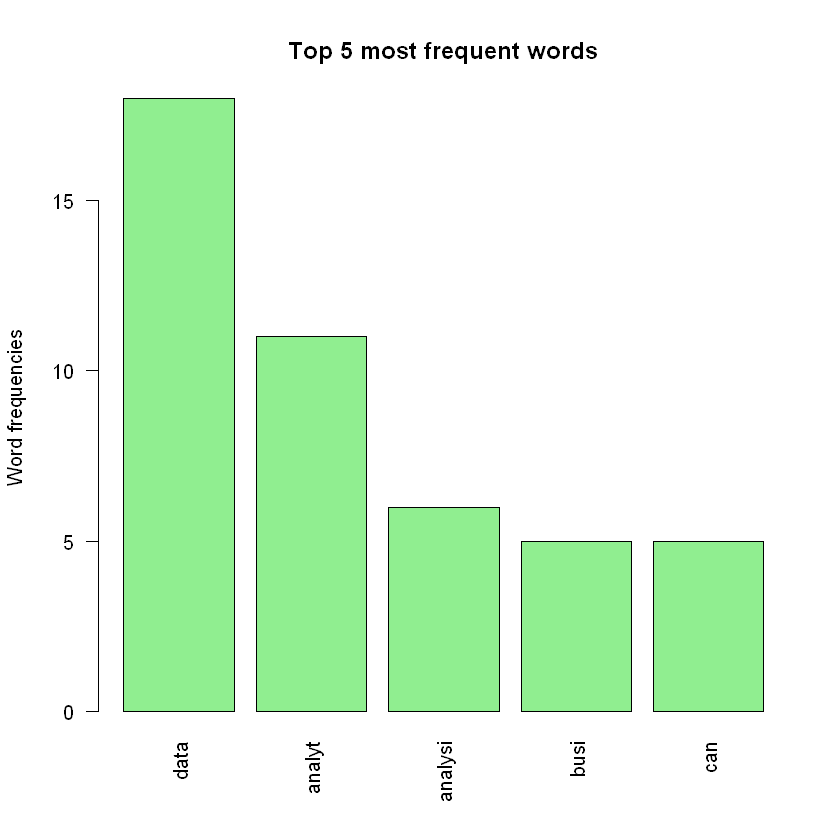

In [26]:

# Plot the most frequent words
barplot(dtm_d[1:5,]$freq, las = 2, names.arg = dtm_d[1:5,]$word,
        col ="lightgreen", main ="Top 5 most frequent words",
        ylab = "Word frequencies")




The most frequent word in the document is "data"